In [109]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix

In [110]:
df = pd.read_csv("drug_consumption.csv", 
                  names=["Age", "Gender", "Education", "Country", "Ethnicity", "Nscore", "Escore", "Oscore", "Ascore", "Cscore", "Impulsive", "SS", "Alcohol", "Amphet", "Amyl", "Benzos", "Caff", "Cannabis", "Choc", "Coke", "Crack", "Ecstasy", "Heroin", "Ketamine", "Legalh", "LSD", "Meth", "Mushrooms", "Nicotine", "Semer", "VSA"])

In [111]:
all_substances = ["Alcohol", "Amphet", "Amyl", "Benzos", "Caff", "Cannabis", "Choc", "Coke", "Crack", "Ecstasy", "Heroin", "Ketamine", "Legalh", "LSD", "Meth", "Mushrooms", "Nicotine", "Semer", "VSA"]

# remove CL and convert strings to ints
# CL0   - Never used  : 0
# CL1-2 - Former user : 1
# CL3-6 - User        : 2
for i in range(len(all_substances)):
    df[arr[i]].replace({"CL0": "0", "CL1": "1", "CL2": "1", "CL3": "2", "CL4": "2", "CL5": "2", "CL6": "2"}, inplace=True)
    df[arr[i]] = pd.to_numeric(df[arr[i]])

In [112]:
df.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,0,0,0,0,0,0,0,1,0,0
2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,2,0,1,0,1,2,0,2,0,0
3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,0,0,0,0,0,0,1,0,0,0
4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,0,0,1,0,0,0,0,1,0,0
5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,1,0,0,1,0,0,1,1,0,0


In [120]:
mlp = MLPClassifier(solver = 'sgd', 
                    random_state = 1, 
                    activation = 'logistic', 
                    learning_rate_init = 0.3, 
                    batch_size = 100, 
                    hidden_layer_sizes = (8, 3), 
                    max_iter = 500)

In [121]:
X = df[["Age", "Gender", "Education", "Country", "Ethnicity", "Nscore", "Escore", "Oscore", "Ascore", "Cscore", "Impulsive", "SS"]]

conf_matrices = []  # List of of confusion matrices, one for each substance
selected_substances = ['Alcohol', 'Amphet', 'Cannabis', 'Coke', 'Ecstasy', 'LSD', 'Meth', 'Mushrooms']
for substance in selected_substances:
    y = df[substance]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
    
    mlp.fit(X_train, y_train)
    y_pred = mlp.predict(X_test)
    
    print("--", substance, "--")
    print("Accuracy : ", accuracy_score(y_test, y_pred))
    print("Mean Square Error : ", mean_squared_error(y_test, y_pred))
    conf_matrices.append(confusion_matrix(y_test, y_pred))

-- Alcohol --
Accuracy :  0.9206349206349206
Mean Square Error :  0.14285714285714285
-- Amphet --
Accuracy :  0.5608465608465608
Mean Square Error :  0.8994708994708994
-- Cannabis --
Accuracy :  0.708994708994709
Mean Square Error :  0.48148148148148145
-- Coke --
Accuracy :  0.6084656084656085
Mean Square Error :  0.9629629629629629
-- Ecstasy --
Accuracy :  0.6402116402116402
Mean Square Error :  0.8518518518518519
-- LSD --
Accuracy :  0.6349206349206349
Mean Square Error :  0.8095238095238095
-- Meth --
Accuracy :  0.798941798941799
Mean Square Error :  0.6296296296296297
-- Mushrooms --
Accuracy :  0.6455026455026455
Mean Square Error :  0.8148148148148148


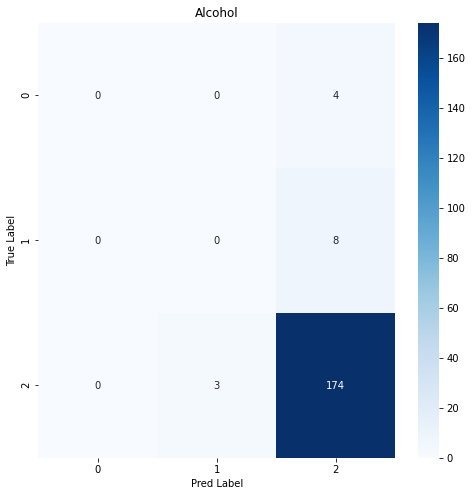

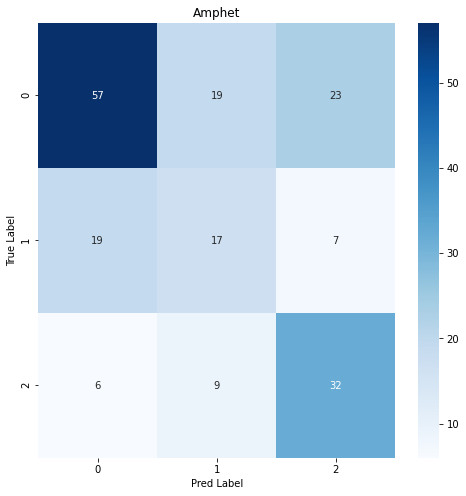

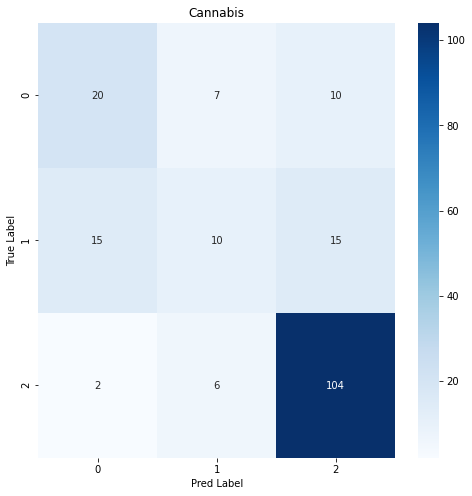

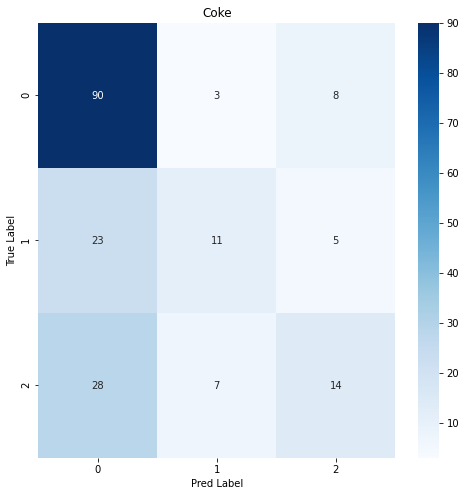

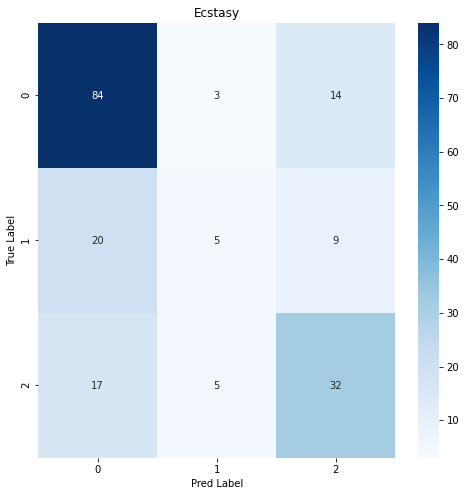

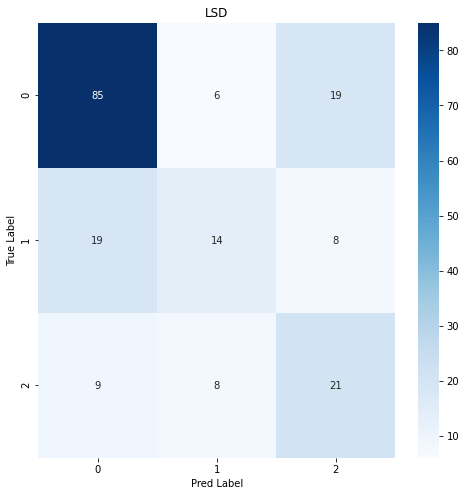

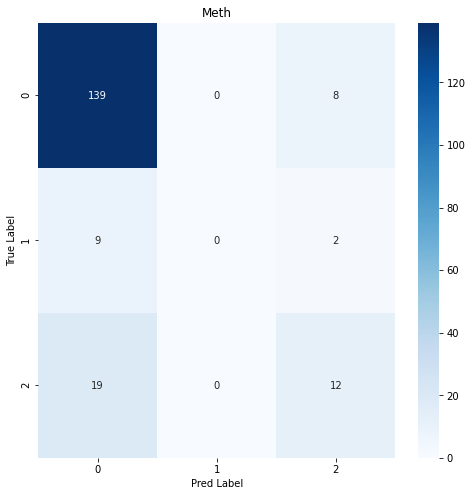

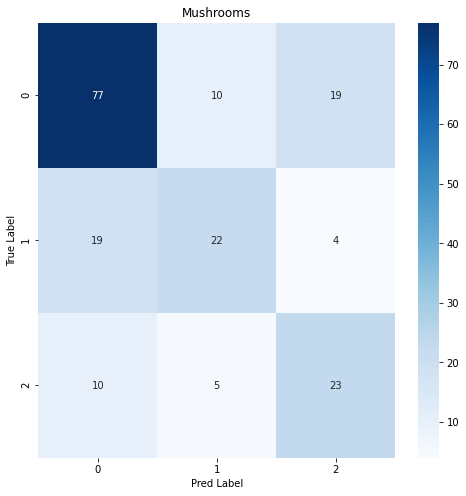

In [122]:
for i, m in enumerate(conf_matrices):
    fig, ax = plt.subplots(figsize=(8,8))
    fig = sns.heatmap(m, annot=True, cmap="Blues", fmt='g', ax=ax)
    fig.set_title(selected_substances[i])
    fig.set_ylabel("True Label")
    fig.set_yticklabels(["0", "1", "2"])
    fig.set_xlabel("Pred Label")
    fig.set_xticklabels(["0", "1", "2"])